<a href="https://colab.research.google.com/github/tjdwn123/2025-1-myclass-BDA/blob/main/inclass/10W_A_mon_0519_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10주 단원 08-3 그래프 만들기


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 2.19 MiB | 3.84 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
pd.set_option('display.precision', 2)

In [5]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [6]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [10]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 97.8 MB/s eta 0:00:00


In [7]:
mpg.isna().sum().sum()

np.int64(0)

In [8]:
plt.rcParams.update({'figure.dpi' : '100'})
plt.rcParams.update({'figure.figsize' : [4, 2.5]})

<Axes: xlabel='displ', ylabel='hwy'>

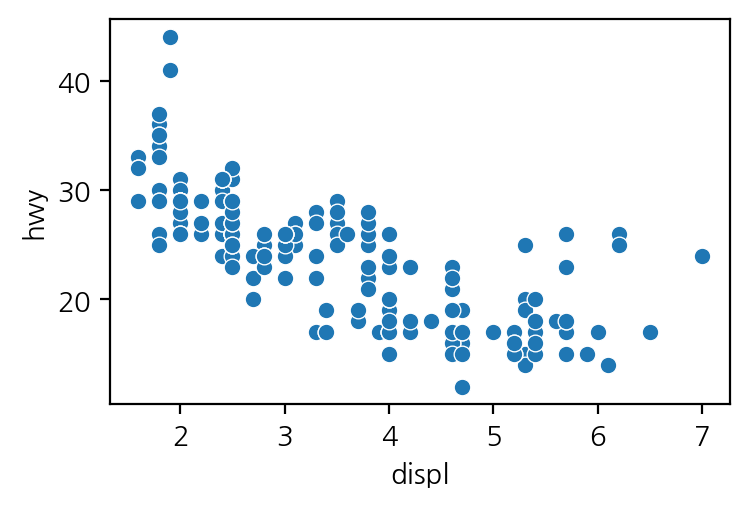

In [11]:
import koreanize_matplotlib

sns.scatterplot(data=mpg, x='displ', y='hwy')

In [13]:
mpg.groupby('drv',as_index=False).count()

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [14]:
mpg.groupby('drv',as_index=False).count()[['drv','model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [16]:
mpg.groupby('drv',as_index=False).count()[['drv','model']].rename(columns={'model':'n'})C

,drv,n
0,4,103
1,f,106
2,r,25


In [17]:
df_mpg2=mpg.groupby('drv').agg(n=('drv','count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


<Axes: xlabel='drv', ylabel='n'>

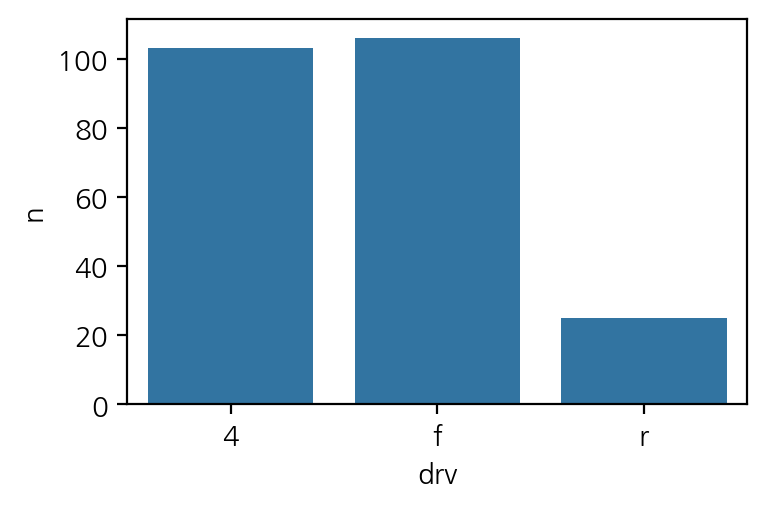

In [18]:
sns.barplot(data=df_mpg2, x='drv', y='n')

<Axes: xlabel='drv', ylabel='n'>

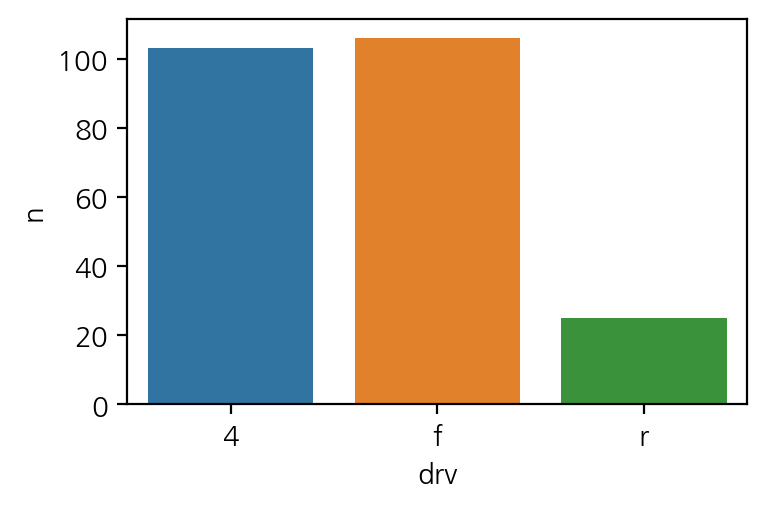

In [19]:
sns.barplot(data=df_mpg2, x='drv', y='n',hue='drv')

<Axes: xlabel='drv', ylabel='count'>

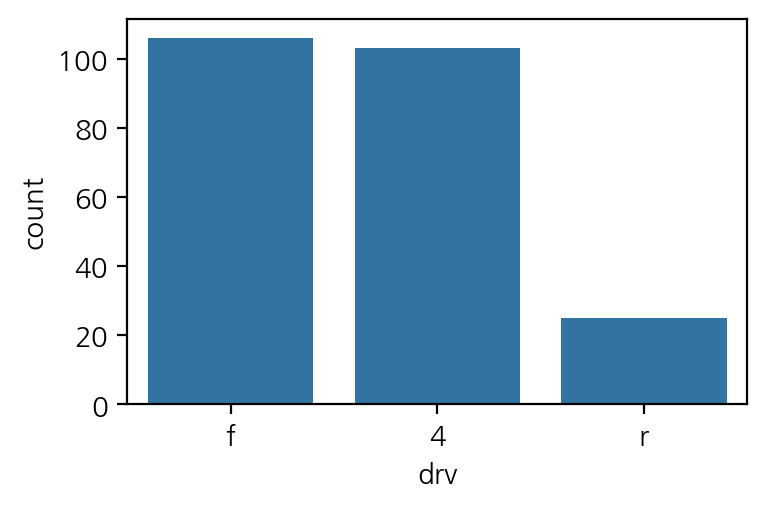

In [20]:
sns.countplot(mpg,x='drv')

<Axes: xlabel='drv', ylabel='count'>

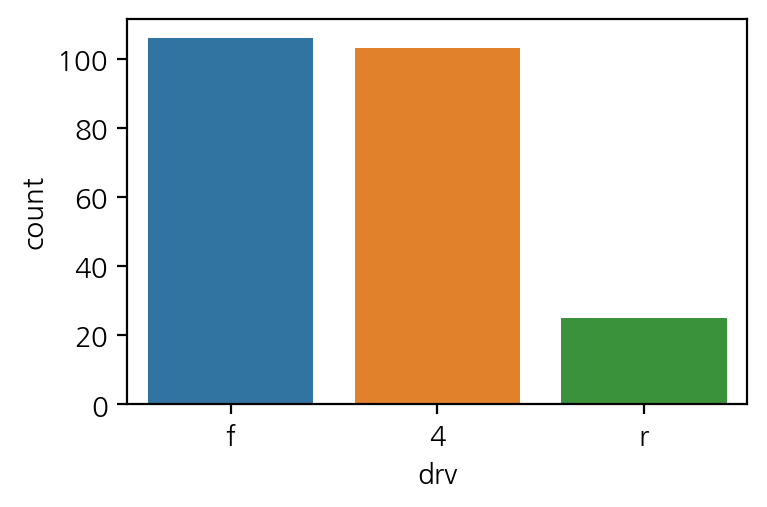

In [21]:
sns.countplot(mpg,x='drv',hue='drv')

<Axes: xlabel='drv', ylabel='count'>

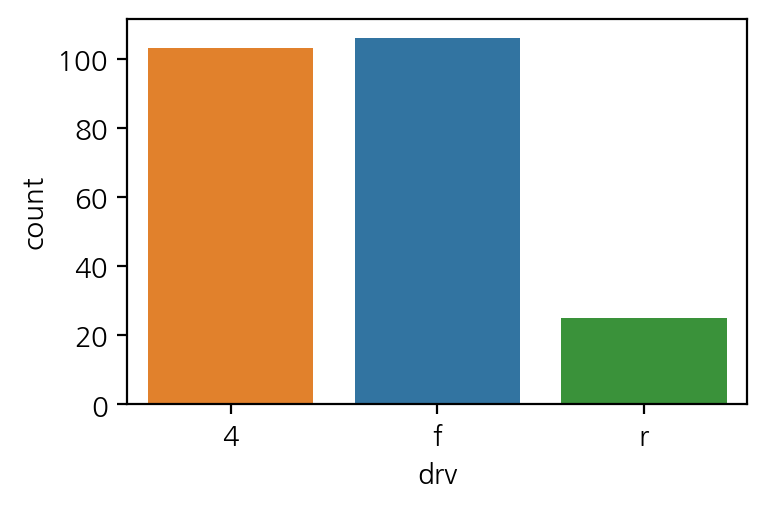

In [23]:
sns.countplot(mpg,x='drv',hue='drv',order=['4','f','r'])

In [26]:
eco=pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [27]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [28]:
eco.tail()

,date,pce,pop,psavert,uempmed,unemploy
569,2014-12-01,12062.0,319746.16,7.6,12.9,8717
570,2015-01-01,12046.0,319928.65,7.7,13.2,8903
571,2015-02-01,12082.4,320074.51,7.9,12.9,8610
572,2015-03-01,12158.3,320230.79,7.4,12.0,8504
573,2015-04-01,12193.8,320402.29,7.6,11.5,8526


In [30]:
eco.shape

(574, 6)

<Axes: xlabel='date', ylabel='unemploy'>

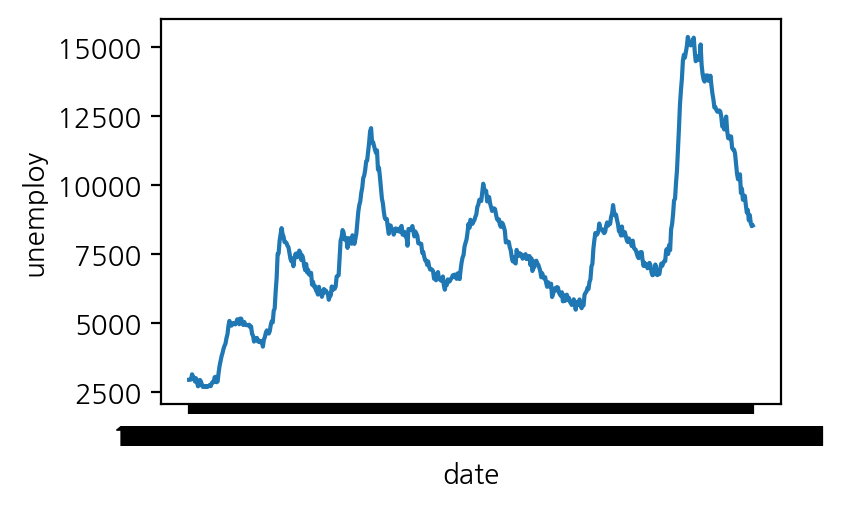

In [31]:
sns.lineplot(data=eco, x='date', y='unemploy')

<Axes: xlabel='date', ylabel='unemploy'>

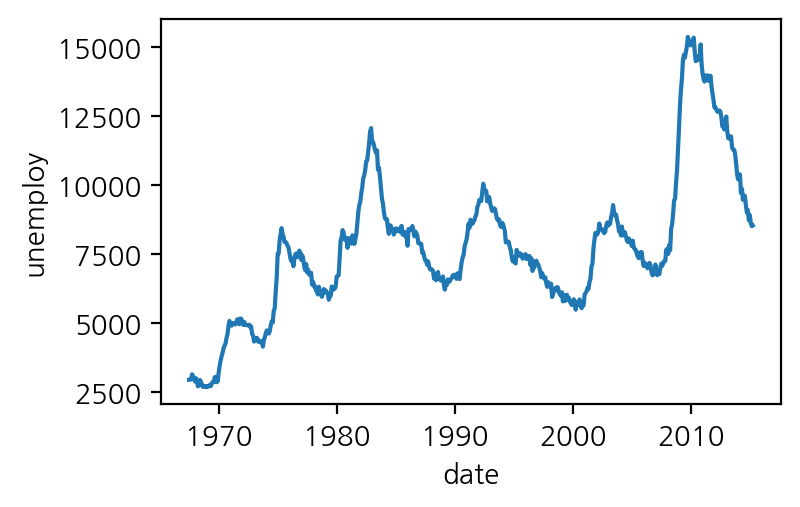

In [33]:
eco['date'] = pd.to_datetime(eco['date'])
sns.lineplot(data=eco, x='date', y='unemploy')

<Axes: xlabel='date', ylabel='unemploy'>

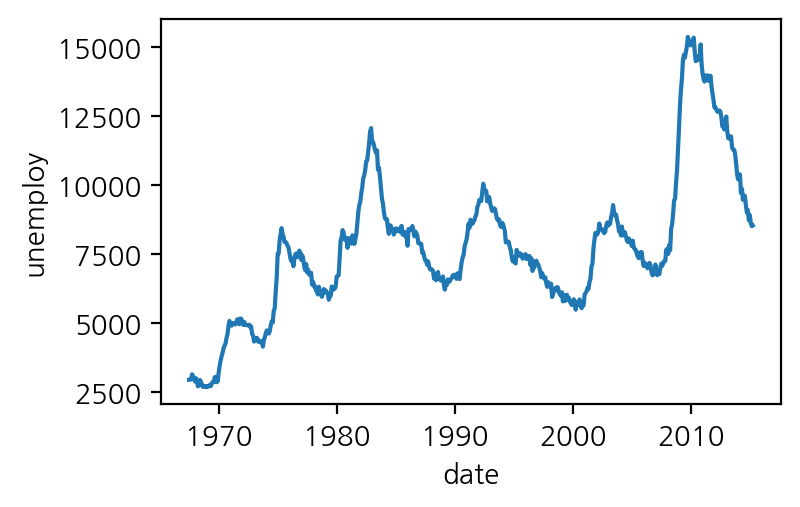

In [34]:
sns.lineplot(eco,x=pd.to_datetime(eco['date']),y='unemploy')

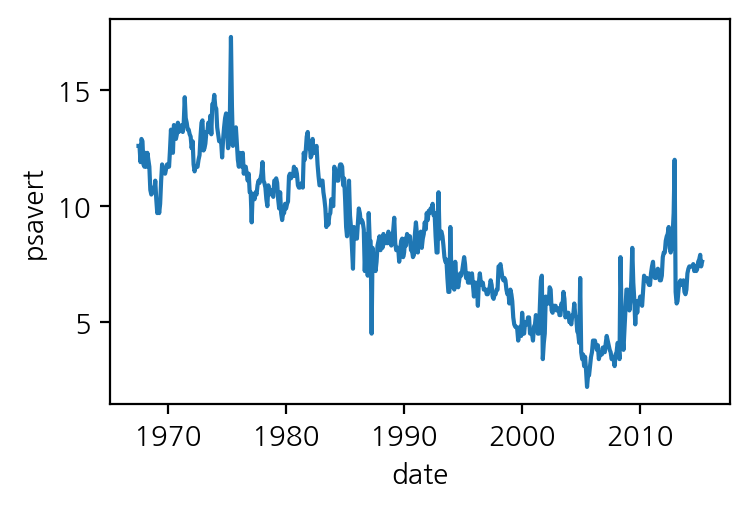

In [35]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='psavert');

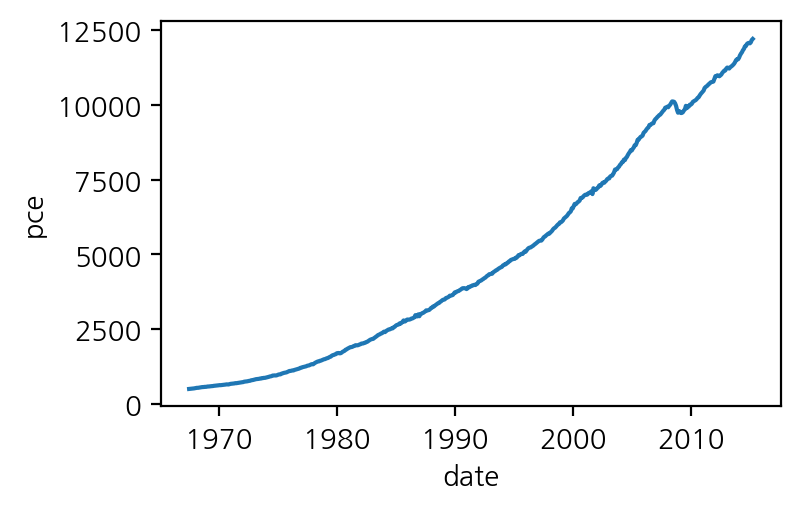

In [36]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='pce');

In [37]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    datetime64[ns]
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 27.0 KB


In [38]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    datetime64[ns]
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 31.5 KB


In [39]:
eco[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [40]:
eco[['date', 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    datetime64[ns]
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 9.1 KB


In [41]:
eco['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [42]:
eco['date2'].dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [43]:
eco['date2'].dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [44]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco['day'] = eco['date2'].dt.day

In [45]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    datetime64[ns]
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](2), float64(4), int32(3), int64(1)
memory usage: 38.2 KB


<Axes: xlabel='year', ylabel='unemploy'>

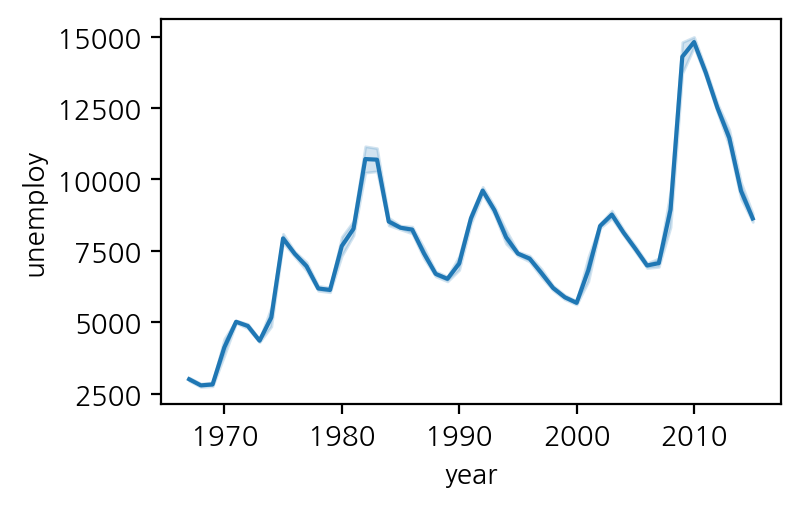

In [46]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

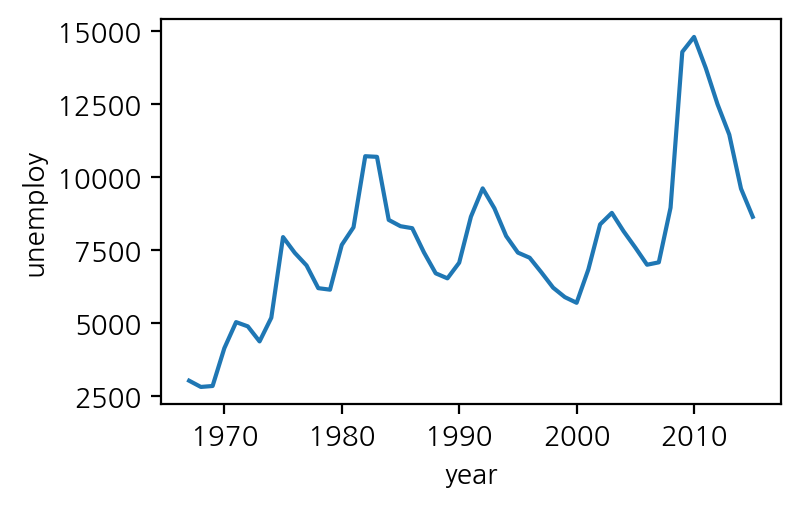

In [47]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy', errorbar=None)

In [52]:
plt.rcParams.update({'figure.figsize': [7, 3]})

<Axes: xlabel='drv', ylabel='hwy'>

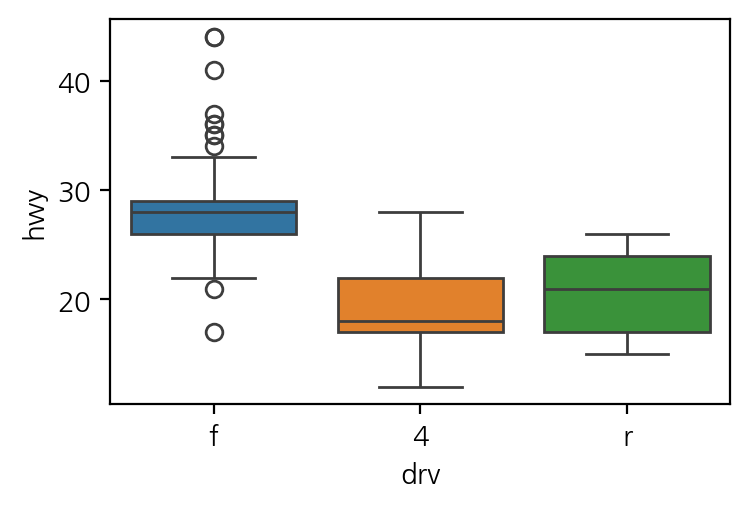

In [49]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')

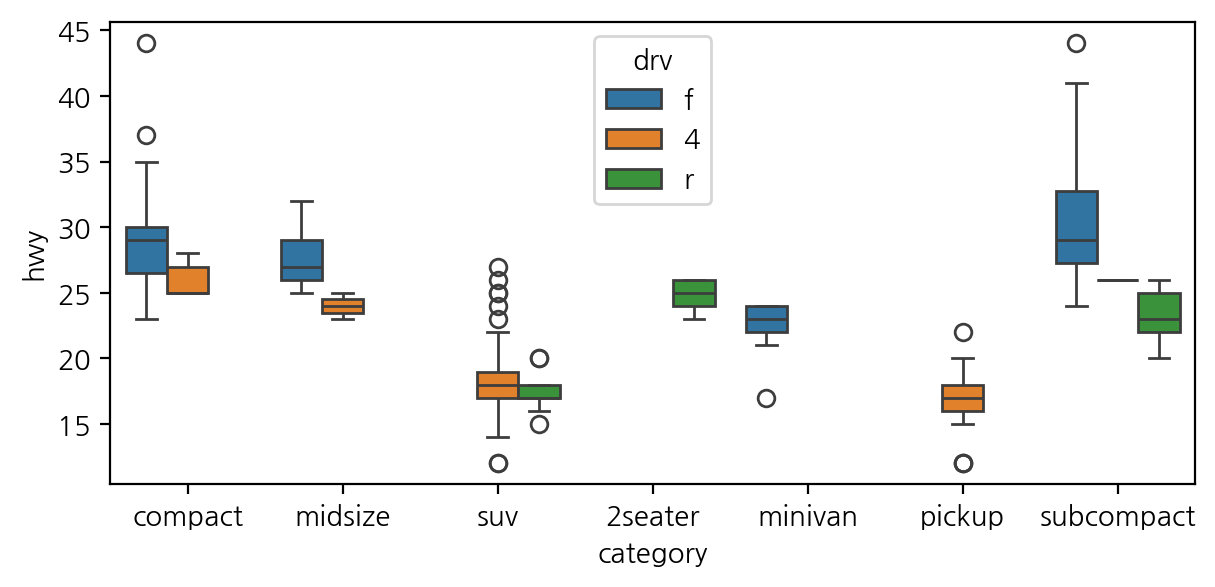

In [53]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

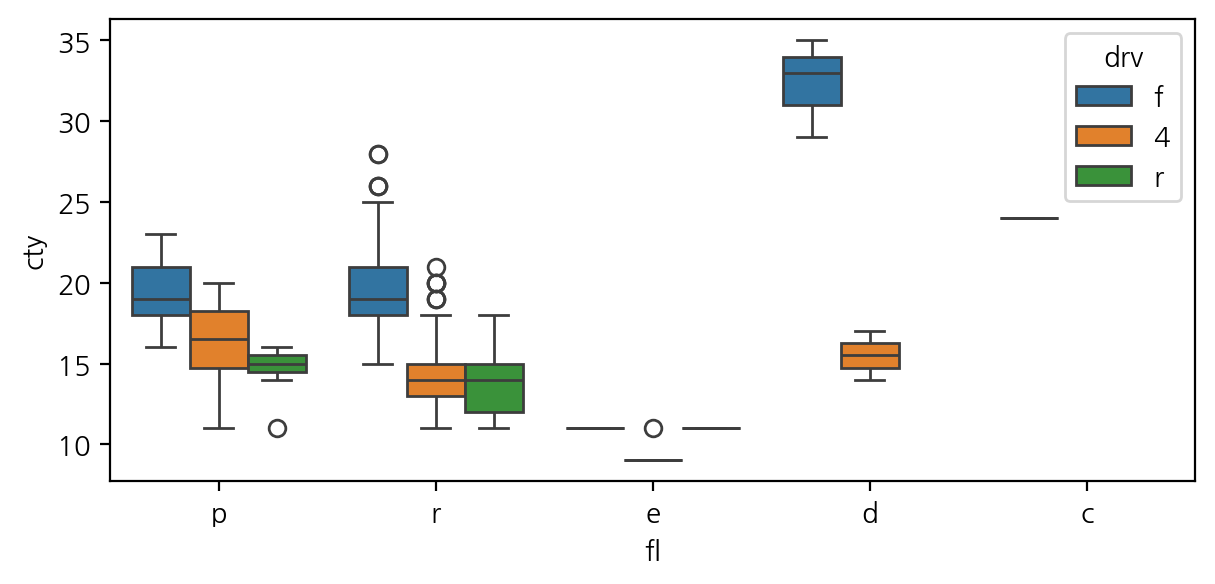

In [54]:
sns.boxplot(mpg, x='fl', y='cty', hue='drv');

In [55]:
mpg.query('fl == "e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [56]:
mpg[ mpg.fl == "e" ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


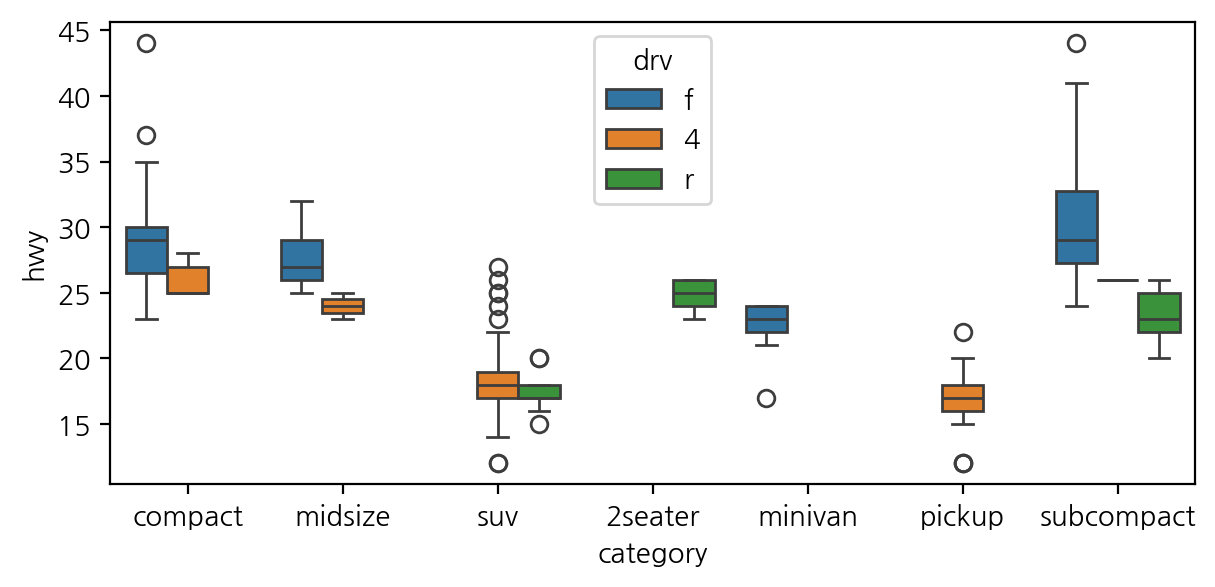

In [57]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

### 정리하기

| seaborn 함수      | 그래프                    |
|-------------------|---------------------------|
| sns.scatterplot() | 산점도                    |
| sns.barplot()     | 막대 그래프 - 요약표 활용 |
| sns.countplot()   | 막대 그래프 - 원자료 활용 |
| sns.lineplot()    | 선 그래프                 |
| sns.boxplot()     | 상자 그림                 |

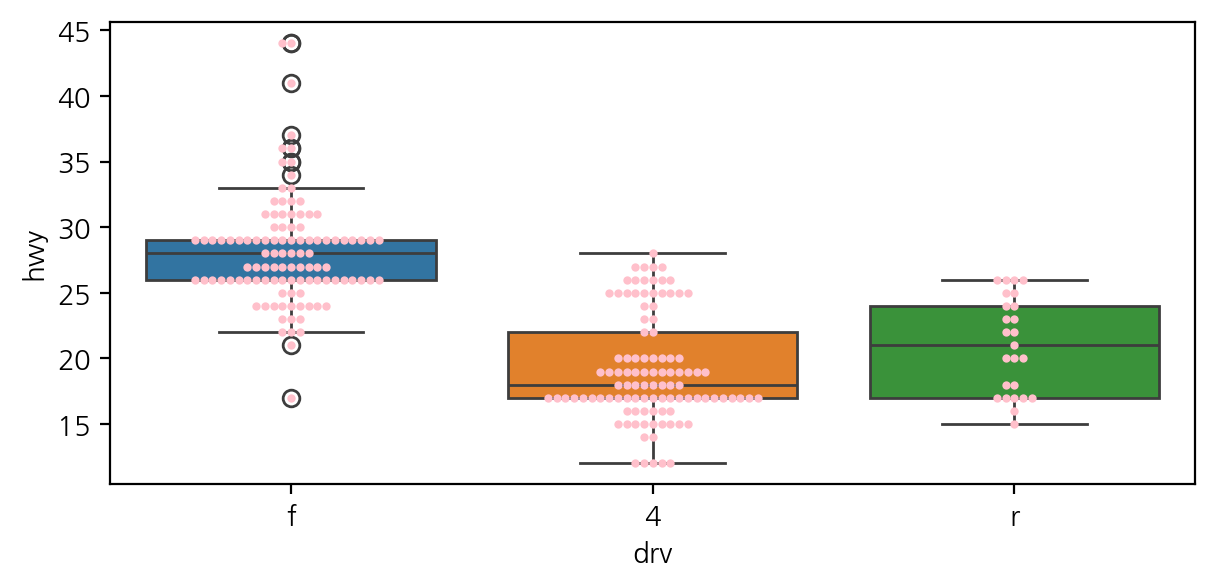

In [58]:
sns.boxplot(mpg, x='drv', y = 'hwy', hue='drv');
sns.swarmplot(mpg, x='drv', y = 'hwy', color='pink', size=3);

In [59]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [60]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 6, 7],
                      'final' : [70, 83, 65, 95, 80]})

In [61]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [62]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,6,95
4,7,80


In [63]:
display_side_by_side(test1, test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [64]:
display_side_by_side(test1, test2, test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


### 08 단원 종료